# CIA Country Analysis and Clustering


Source: All these data sets are made up of data from the US government. 
https://www.cia.gov/library/publications/the-world-factbook/docs/faqs.html

## Goal: 

### Gain insights into similarity between countries and regions of the world by experimenting with K-Means Clustering
----

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Perform Exploratory Data Analysis

In [3]:
data = pd.read_csv('cia_factbook.csv')

# Display the first few rows
print(data.head())

         country        area  birth_rate  death_rate  infant_mortality_rate  \
0         Russia  17098242.0       11.87       13.83                   7.08   
1         Canada   9984670.0       10.29        8.31                   4.71   
2  United States   9826675.0       13.42        8.15                   6.17   
3          China   9596960.0       12.17        7.44                  14.79   
4         Brazil   8514877.0       14.72        6.54                  19.21   

   internet_users  life_exp_at_birth  maternal_mortality_rate  \
0      40853000.0              70.16                     34.0   
1      26960000.0              81.67                     12.0   
2     245000000.0              79.56                     21.0   
3     389000000.0              75.15                     37.0   
4      75982000.0              73.28                     56.0   

   net_migration_rate    population  population_growth_rate  
0                1.69  1.424703e+08                   -0.03  
1         

-----

<Figure size 1200x800 with 0 Axes>

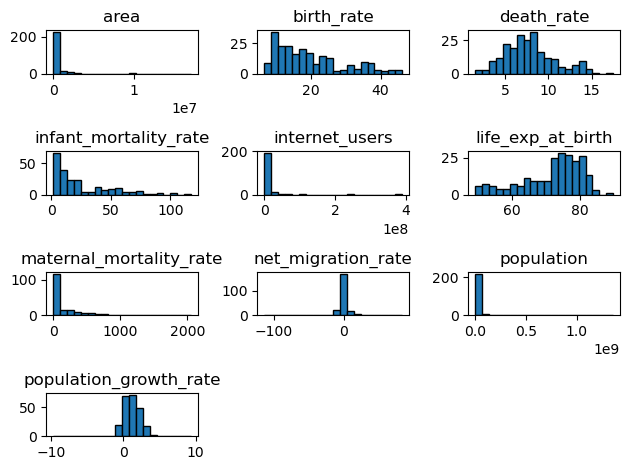

In [6]:
import matplotlib.pyplot as plt

# Remove non-numeric columns
numeric_data = data.drop(columns=['country'])

# Plot histograms for each numerical feature
plt.figure(figsize=(12, 8))
numeric_data.hist(bins=20, edgecolor='black', grid=False)
plt.tight_layout()
plt.show()

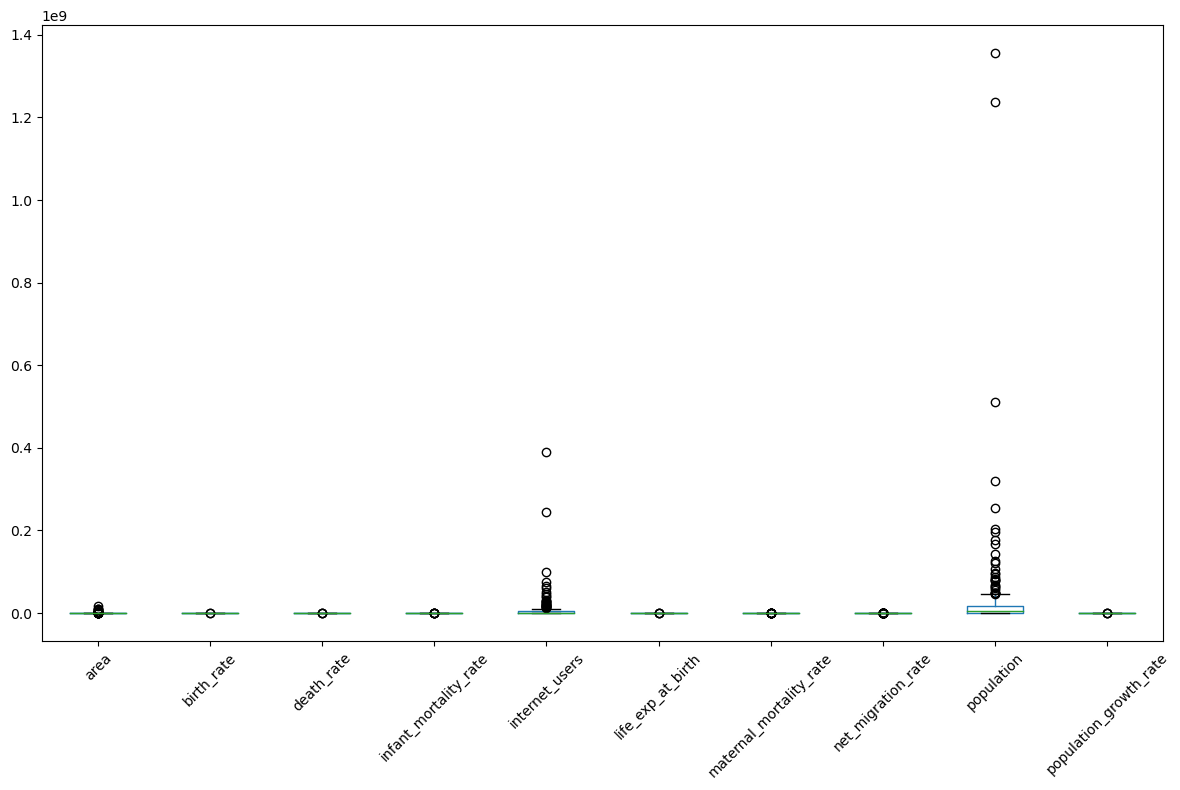

In [7]:
# Plot box plots for each numerical feature
plt.figure(figsize=(12, 8))
numeric_data.boxplot(grid=False)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

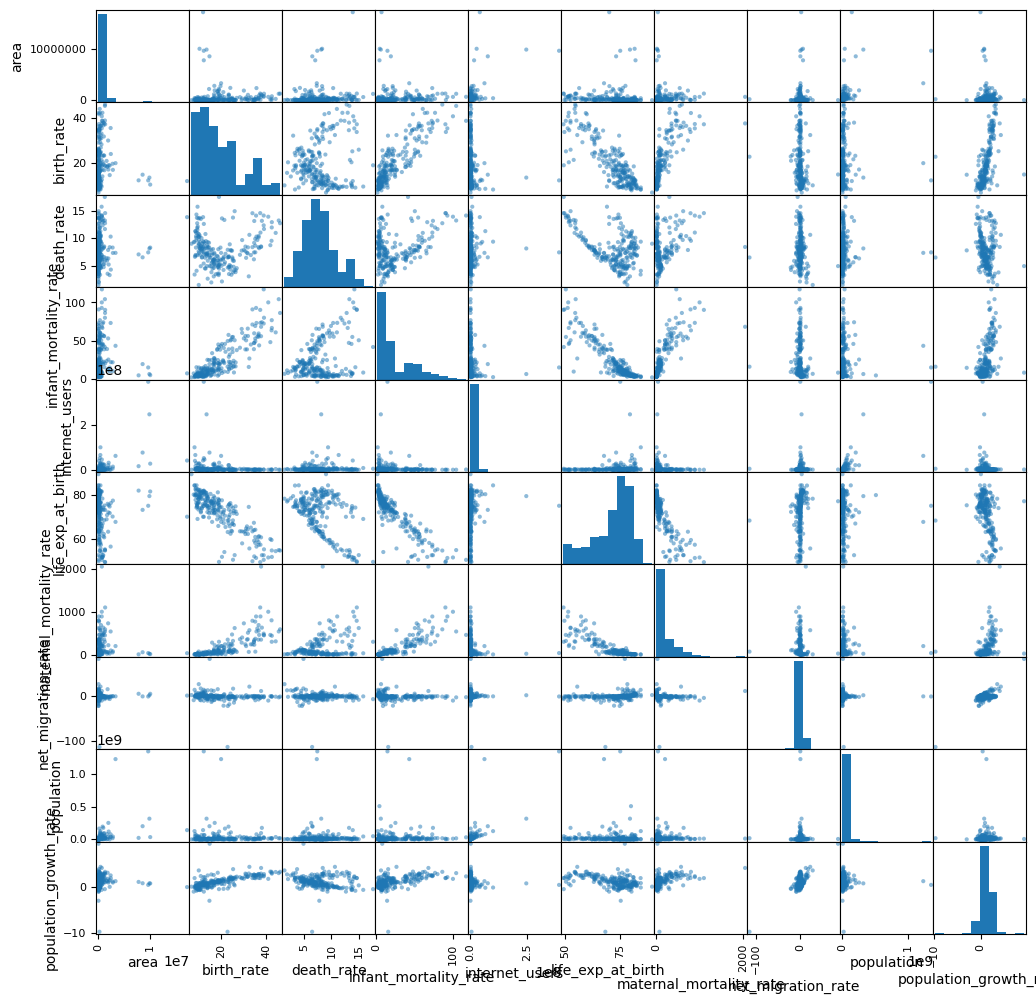

In [8]:
# Plot scatter plots for pairs of numerical features
pd.plotting.scatter_matrix(numeric_data, figsize=(12, 12))
plt.show()

## 2. Feature Engineering for Missing Data

**TASK: What countries have NaN for Agriculture? What is the main aspect of these countries?**

In [14]:
#since there is no agriculture category, i opted to use instead area
# Filter countries with NaN values for Agriculture
missing_data = data[data['life_exp_at_birth'].isnull()]

# Display countries with NaN values for Agriculture
print("Countries with NaN values for area:")
print(missing_data[['country', 'life_exp_at_birth']])

# Analyze main aspects of these countries
main_aspects = missing_data.drop(columns=['country', 'life_exp_at_birth']).describe().transpose()

Countries with NaN values for area:
                                           country  life_exp_at_birth
41                                     South Sudan                NaN
124                                       Svalbard                NaN
160                                     Montenegro                NaN
163              Falkland Islands (Islas Malvinas)                NaN
167                                         Kosovo                NaN
208                                           Niue                NaN
217                               Christmas Island                NaN
223                                   Saint Martin                NaN
225                               Pitcairn Islands                NaN
226                                 Norfolk Island                NaN
231                        Cocos (Keeling) Islands                NaN
232                                        Tokelau                NaN
235                        Holy See (Vatican City)    

**TASK: Notice climate is missing for a few countries, but not the Region! Let's use this to our advantage. Fill in the missing Climate values based on the mean climate value for its region.**

Hints on how to do this: https://stackoverflow.com/questions/19966018/pandas-filling-missing-values-by-mean-in-each-group


In [17]:
population_mean_life_exp = data.groupby('population')['life_exp_at_birth'].mean()

# Iterate over the missing values in life_exp_at_birth and fill them in using the mean for their population group
for index, row in data[data['life_exp_at_birth'].isnull()].iterrows():
    population = row['population']
    if population in population_mean_life_exp:
        data.at[index, 'life_exp_at_birth'] = population_mean_life_exp[population]

# Verify that missing values have been filled
print("Number of missing values for life_exp_at_birth after filling:", data['life_exp_at_birth'].isnull().sum())

Number of missing values for life_exp_at_birth after filling: 35


In [19]:
#since there is no agriculture category, i opted to use instead area
# Filter countries with NaN values for Agriculture
missing_data = data[data['life_exp_at_birth'].isnull()]

# Display countries with NaN values for Agriculture
print("Countries with NaN values for area:")
print(missing_data[['country', 'life_exp_at_birth']])

# Analyze main aspects of these countries
main_aspects = missing_data.drop(columns=['country', 'life_exp_at_birth']).describe().transpose()

Countries with NaN values for area:
                                           country  life_exp_at_birth
41                                     South Sudan                NaN
124                                       Svalbard                NaN
160                                     Montenegro                NaN
163              Falkland Islands (Islas Malvinas)                NaN
167                                         Kosovo                NaN
208                                           Niue                NaN
217                               Christmas Island                NaN
223                                   Saint Martin                NaN
225                               Pitcairn Islands                NaN
226                                 Norfolk Island                NaN
231                        Cocos (Keeling) Islands                NaN
232                                        Tokelau                NaN
235                        Holy See (Vatican City)    

**TASK:Use the same method for the missing values in Literacy.**

In [18]:
# Group the data by population and calculate the mean internet_users for each group
population_mean_internet_users = data.groupby('population')['internet_users'].mean()

# Iterate over the missing values in internet_users and fill them in using the mean for their population group
for index, row in data[data['internet_users'].isnull()].iterrows():
    population = row['population']
    if population in population_mean_internet_users:
        data.at[index, 'internet_users'] = population_mean_internet_users[population]

# Verify that missing values have been filled
print("Number of missing values for internet_users after filling:", data['internet_users'].isnull().sum())

Number of missing values for internet_users after filling: 46


# 3. Data Feature Preparation

**TASK: Create a dummy variable to all categorical data.**

In [20]:
# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Create dummy variables for categorical data
dummy_data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Display the first few rows of the dummy data
print(dummy_data.head())

         area  birth_rate  death_rate  infant_mortality_rate  internet_users  \
0  17098242.0       11.87       13.83                   7.08      40853000.0   
1   9984670.0       10.29        8.31                   4.71      26960000.0   
2   9826675.0       13.42        8.15                   6.17     245000000.0   
3   9596960.0       12.17        7.44                  14.79     389000000.0   
4   8514877.0       14.72        6.54                  19.21      75982000.0   

   life_exp_at_birth  maternal_mortality_rate  net_migration_rate  \
0              70.16                     34.0                1.69   
1              81.67                     12.0                5.66   
2              79.56                     21.0                2.45   
3              75.15                     37.0               -0.32   
4              73.28                     56.0               -0.15   

     population  population_growth_rate  ...  country_Venezuela  \
0  1.424703e+08                   -0.

**TASK: For numerical data perform standard scaler.**

In [23]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Initialize StandardScaler
scaler = StandardScaler()

# Perform standard scaling on numerical data
scaled_numerical_data = scaler.fit_transform(data[numerical_columns])

# Create a DataFrame with scaled numerical data
scaled_numerical_df = pd.DataFrame(scaled_numerical_data, columns=numerical_columns)

# Combine scaled numerical data with dummy variables
final_data = pd.concat([scaled_numerical_df, dummy_data], axis=1)

# Display the first few rows of the final data
print(final_data.head())

       area  birth_rate  death_rate  infant_mortality_rate  internet_users  \
0  9.782533   -0.807327    1.992068              -0.724460        0.973458   
1  5.582179   -0.971092    0.135547              -0.823111        0.557854   
2  5.488888   -0.646671    0.081735              -0.762338        7.080433   
3  5.353248   -0.776232   -0.157057              -0.403531       11.388134   
4  4.714310   -0.511928   -0.459751              -0.219548        2.024327   

   life_exp_at_birth  maternal_mortality_rate  net_migration_rate  population  \
0          -0.189875                -0.549947            0.168344    0.864581   
1           1.121238                -0.633983            0.525437    0.019936   
2           0.880886                -0.599604            0.236705    2.249012   
3           0.378540                -0.538488           -0.012451   10.385072   
4           0.165527                -0.465911            0.002840    1.336881   

   population_growth_rate  ...  country_Vene

# 4. Creating and Fitting Kmeans Model

**TASK:** 

- Plot the within sum of squares vs. the number of cluster and find the optimal number of clusters.
- Fit a k-means model of the optimum cluster.

-----

# 5. Model Interpretation


**TASK: What K value do you think is a good choice? Are there multiple reasonable choices? What features are helping define these cluster choices.**

---